In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram
from IPython.core.display import Image

In [2]:
df = gpd.read_file("counties.geojson")
df.head()

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
0,Racine County,195408,861533739,82164,0.230906,0.100167,0.072588,0.482126,"POLYGON ((645313.81834 2212738.58489, 645456.3..."
1,Clark County,34690,3133378070,15076,0.046476,0.326691,0.022979,0.444642,"POLYGON ((431909.29098 2393751.35940, 433872.5..."
2,Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
3,Rusk County,14755,2366092584,8883,0.035567,0.473937,0.049572,0.138357,"POLYGON ((397166.23292 2498521.78567, 397167.7..."
4,Ozaukee County,86395,603514413,36267,0.222642,0.088609,0.127867,0.389109,"POLYGON ((654796.85595 2272096.94081, 654799.8..."


<AxesSubplot:xlabel='crops', ylabel='pasture'>

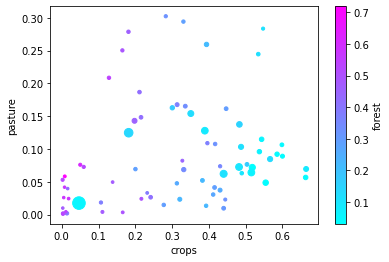

In [3]:
df.plot.scatter(x="crops", y="pasture",
                c="forest", cmap="cool", s=df["developed"] * 200,
               sharex=False)

<AxesSubplot:>

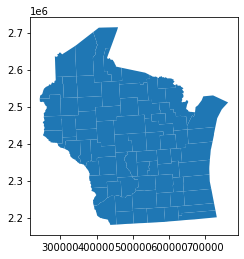

In [4]:
df.plot()

# Clustering Counties (KMeans)

1.2909085151228035


<AxesSubplot:>

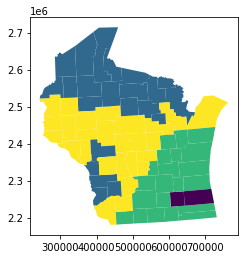

In [5]:
c = KMeans(4)
c.fit(df[["forest", "pasture", "developed", "crops"]])
print(c.inertia_)
groups = c.predict(df[["forest", "pasture", "developed", "crops"]])
df.plot(column=groups)

# Clustering Counties (Agglomerative)

<AxesSubplot:>

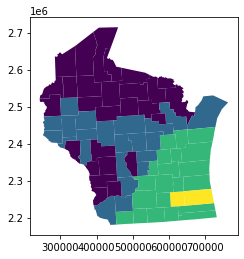

In [29]:
c = AgglomerativeClustering(4, compute_distances=True)

#c.fit(df[["forest", "pasture", "developed", "crops"]])
#groups = c.predict(df[["forest", "pasture", "developed", "crops"]])

groups = c.fit_predict(df[["forest", "pasture", "developed", "crops"]])

# print(c.inertia_)  # don't have it because we don't have centroids for this one!
df.plot(column=groups)

# Tree Recursion: Node Count

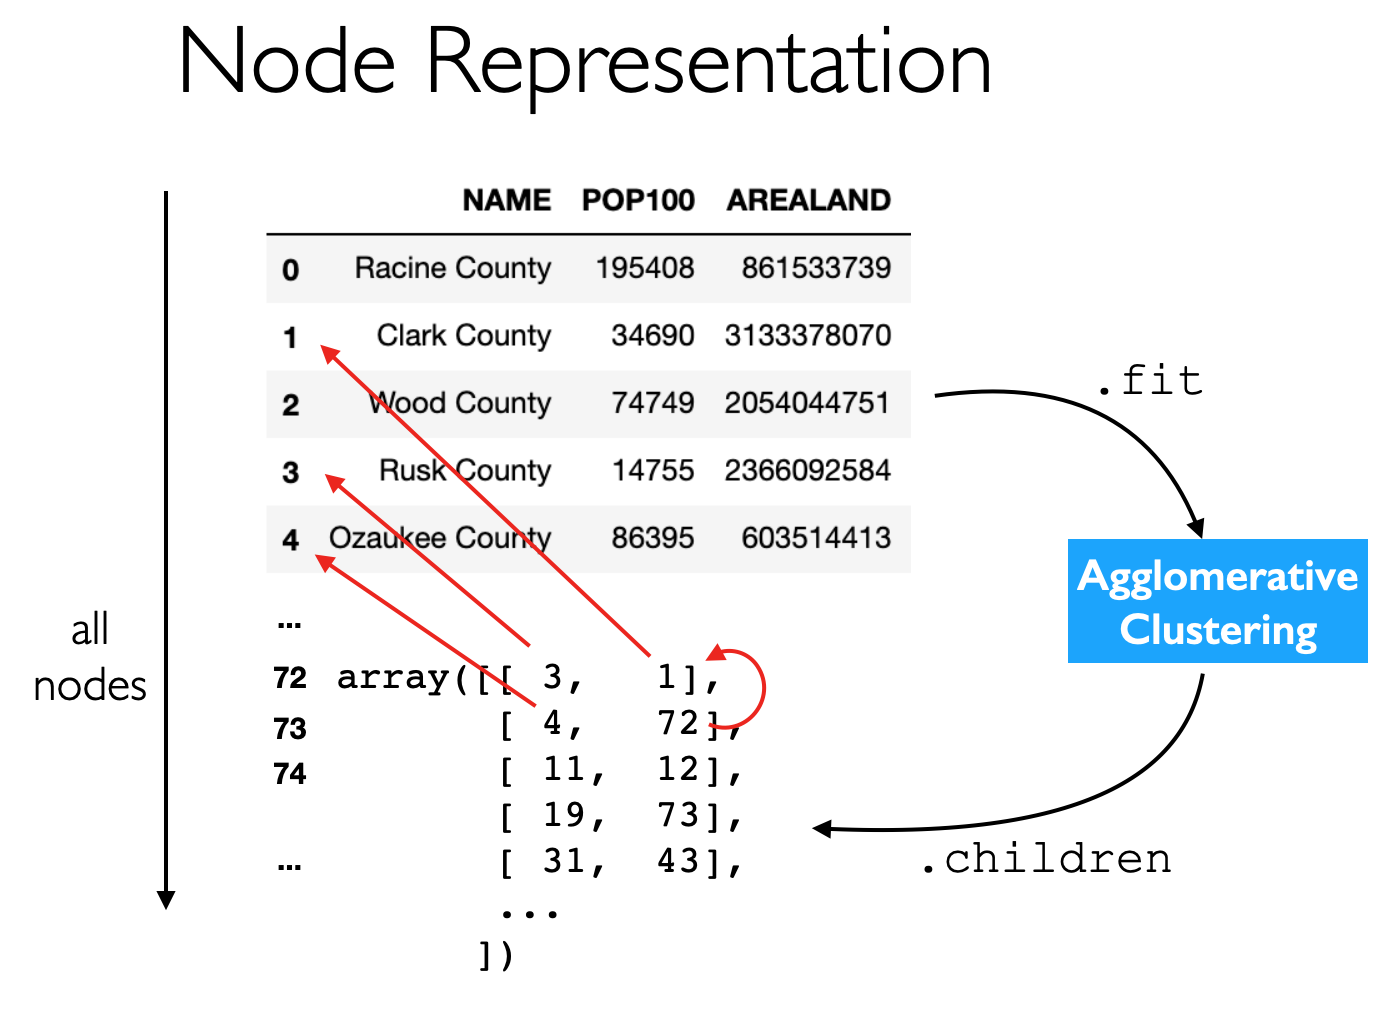

In [8]:
Image("children.png", width=500)

In [9]:
len(df)

72

In [13]:
c.children_[73 - len(df)]

array([21, 53])

In [10]:
df.iloc[[44, 62]]

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
44,Forest County,9304,2626939844,8970,0.031107,0.534801,0.004466,0.011161,"POLYGON ((568513.86038 2567267.07976, 568511.3..."
62,Menominee County,4232,926217566,2253,0.029589,0.533466,0.001092,0.002670,"POLYGON ((551112.77265 2479206.62887, 551125.3..."


In [7]:
c.children_

array([[ 44,  62],
       [ 21,  53],
       [ 11,  12],
       [ 19,  73],
       [ 31,  43],
       [ 20,  35],
       [ 58,  74],
       [  1,  27],
       [ 50,  77],
       [ 24,  68],
       [ 16,  34],
       [ 26,  57],
       [ 22,  65],
       [ 39,  47],
       [ 63,  69],
       [ 28,  38],
       [  9,  33],
       [  0,  10],
       [  2,  42],
       [  6,  64],
       [ 30,  61],
       [  3,  60],
       [ 36,  59],
       [  8,  66],
       [ 37,  88],
       [ 32,  70],
       [ 13,  54],
       [ 14,  48],
       [ 72,  87],
       [ 40,  55],
       [  4,  51],
       [ 49,  90],
       [ 45,  81],
       [ 67,  75],
       [ 29,  91],
       [ 79,  80],
       [ 23,  76],
       [ 93,  95],
       [ 98, 100],
       [ 46,  86],
       [ 41,  96],
       [ 18,  97],
       [ 25,  83],
       [ 78, 108],
       [ 94, 101],
       [ 82, 107],
       [  5,  84],
       [ 56,  71],
       [ 17, 103],
       [105, 110],
       [ 89, 106],
       [ 92, 115],
       [112,

In [26]:
# how many nodes are in a subtree
def node_count(node_idx):
    if node_idx < len(df):
        # it's a leaf!
        return 1
    else:
        # it's a parent
        left, right = c.children_[node_idx-len(df)]
        #print(left, right)
        return node_count(left) + node_count(right) + 1
        
node_count(141)

89

In [23]:
len(df) + len(c.children_)

143

# Linkage Matrix => Dendrogram

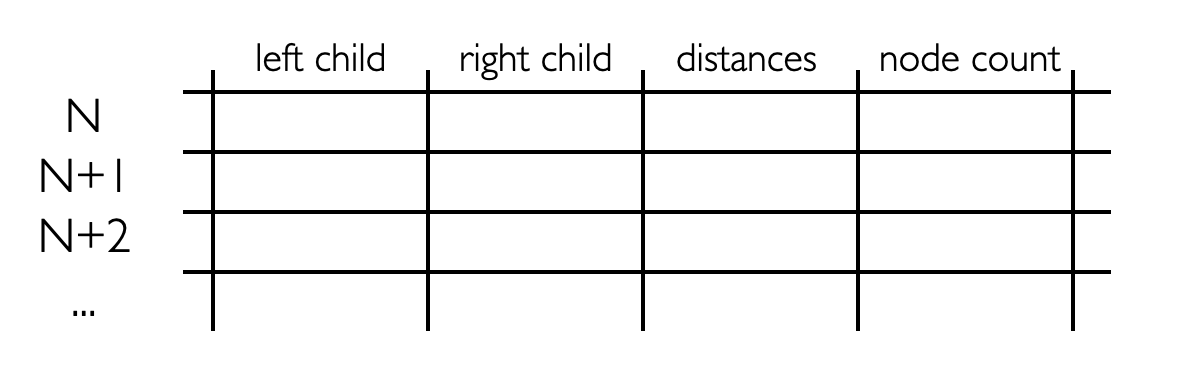

In [27]:
Image("linkage.png", width=500)

In [30]:
c.distances_

array([0.00935791, 0.01604149, 0.02092021, 0.02151293, 0.02424828,
       0.02673536, 0.02938232, 0.03475305, 0.03788484, 0.03875477,
       0.04192914, 0.0423188 , 0.04341326, 0.04484026, 0.04513118,
       0.04576086, 0.04670009, 0.04721484, 0.04756252, 0.05167189,
       0.05353054, 0.0539879 , 0.05482542, 0.05493305, 0.05559517,
       0.06046126, 0.06075136, 0.06293962, 0.0653365 , 0.07148774,
       0.07365618, 0.07755506, 0.08184372, 0.08507794, 0.08512826,
       0.08611516, 0.0933187 , 0.10028075, 0.10776496, 0.11196954,
       0.1129952 , 0.11348526, 0.11556293, 0.11643561, 0.13029843,
       0.13278952, 0.13327272, 0.13973184, 0.14087973, 0.15764458,
       0.16143954, 0.17165262, 0.18668449, 0.20984745, 0.21490193,
       0.23884304, 0.24322474, 0.26496063, 0.26698788, 0.3141989 ,
       0.3409881 , 0.34642599, 0.34903899, 0.45786527, 0.46672959,
       0.49210299, 0.50734432, 0.71479701, 1.15428952, 1.24061603,
       2.63233914])

In [35]:
print(c.children_.shape)
print(c.distances_.reshape(-1,1).shape)

(71, 2)
(71, 1)


In [52]:
counts = np.array([node_count(i+len(df)) for i in range(len(c.children_))])

linkage = np.concatenate([
    c.children_,                # cols 1+2: left+right child indexes
    c.distances_.reshape(-1,1), # col 3: distances
    counts.reshape(-1,1)        # col 4: node count
], axis=1)
#linkage

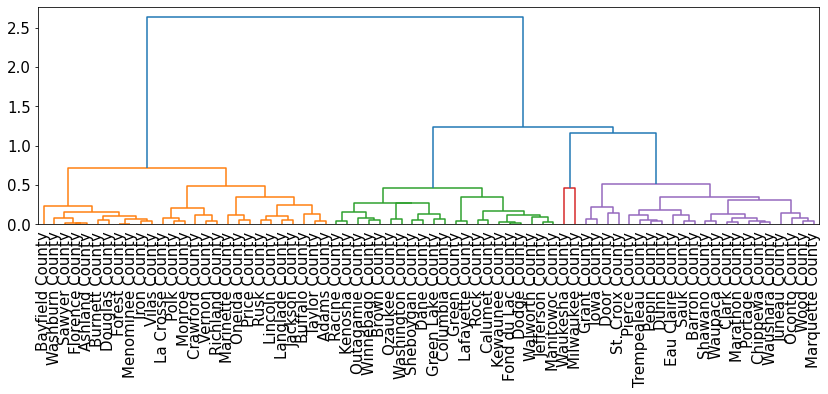

In [54]:
fig, ax = plt.subplots(figsize=(14,4))
dendrogram(linkage, labels=df["NAME"].values, color_threshold=1)
ax.tick_params(labelsize=15)
None

# Moons

https://scikit-learn.org/stable/modules/clustering.html#different-linkage-type-ward-complete-average-and-single-linkage

<AxesSubplot:xlabel='x', ylabel='y'>

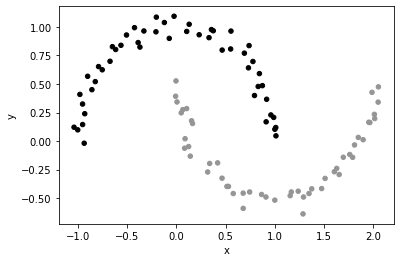

In [57]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns=["x", "y"])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage="single").fit_predict(df[["x", "y"]])
df.plot.scatter(x="x", y="y", c=df["color"], vmin=-1)

# Clustering Pixel Colors in an Image

In [59]:
img = plt.imread("capital.jpg")
img.shape

(688, 600, 3)

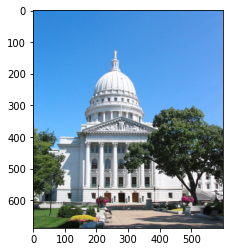

In [60]:
plt.imshow(img)

In [64]:
c = KMeans(4)
groups = c.fit_predict(img.reshape(-1, 3))   # want 1 row per pixel, 3 columns for red, green, blue
c.cluster_centers_ / 255

array([[0.32215798, 0.62316066, 0.92370027],
       [0.46259237, 0.5021948 , 0.49316625],
       [0.87458593, 0.86776776, 0.86458964],
       [0.17599703, 0.2045468 , 0.16608724]])

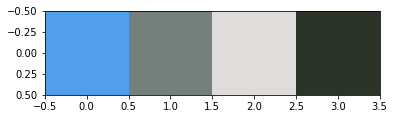

In [65]:
plt.imshow(c.cluster_centers_.reshape(1,4,3) / 255)

In [70]:
img2 = c.cluster_centers_[groups].reshape(img.shape) / 255
img2

array([[[0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        ...,
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027]],

       [[0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        ...,
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027]],

       [[0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        ...,
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027],
        [0.32215798, 0.62316066, 0.92370027]],

       ...,

       [[0.46259237, 0.5021948 , 0.49316625],
        [0.46259237, 0.5021948 , 0.49316625],
        [0.46259237, 0

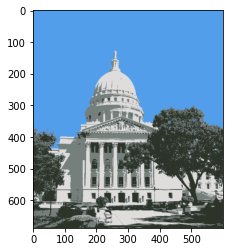

In [71]:
plt.imshow(img2)

# COVID Variants

In [77]:
df = (~pd.read_csv("variants.csv").set_index("Variant").isna()).astype(int)
df

,F 306,R 346,V 367,P 384,Q 414,K 417,N 439,N 440,Y 449,N 450,L 452,S 477,T 478,V 483,E 484,F 490,S 494,N 501,E 516
Variant,,,,,,,,,,,,,,,,,,,
R.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
P.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
P.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
C.36.3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
C.36+L452R,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B.1.1.7+S494P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
B.1.1.7+L452R,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
B.1.1.7+E484K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [80]:
c = AgglomerativeClustering(n_clusters=1, compute_distances=True)
c.fit(df)

AgglomerativeClustering(compute_distances=True, n_clusters=1)

In [82]:
counts = np.array([node_count(i+len(df)) for i in range(len(c.children_))])

linkage = np.concatenate([
    c.children_,                # cols 1+2: left+right child indexes
    c.distances_.reshape(-1,1), # col 3: distances
    counts.reshape(-1,1)        # col 4: node count
], axis=1)

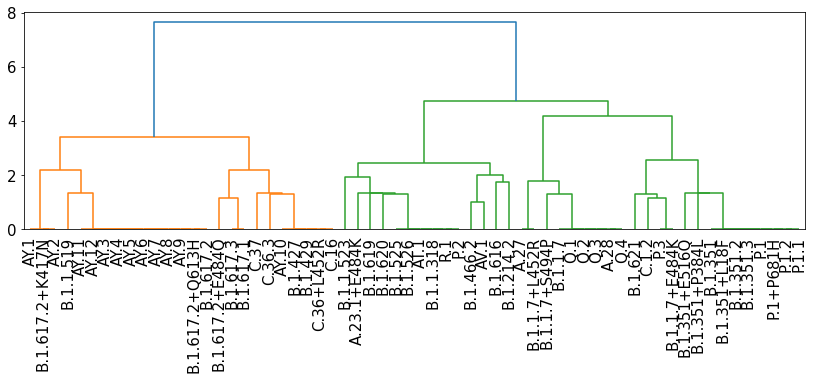

In [88]:
fig, ax = plt.subplots(figsize=(14,4))
dendrogram(linkage, labels=df.index.values)
ax.tick_params(labelsize=15)
None